In [1]:
library(naturalsort)
library(data.table)
library(data.tree)
library(Biostrings)
library(fields)
dataDir <- '../../Data/simout042618_2/'

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: IRanges

Attaching package: ‘IRanges’

The follo

In [2]:
flst<-list.files(dataDir) # Get list of files from directory
flst <- naturalsort(flst) # Natural sort the files
nclst <- c() # Total number of cells for each simulation
ncls <- c() # Number of cells for each genotype
rs <- c() # Division rate for each genotype
# cellPs <- c() # transposition probabilities for each genotype
nGeno <- c() # Number of genotypes for each simulation

k<-1
for (i in 1:20) { # Loop over files
    load(paste0(dataDir,flst[i])) # Load the current simulation output file
    nGeno[k] <- CellPop$totalCount # Get number of genotypes in population (number of L1 insertions)
    if (CellPop$totalCount==1) { # If the genotype tree has 1 node
        nclst[[k]] <- CellPop$ncells[length(CellPop$ncells)] # Get number of cells of node
        ncls[[k]] <- CellPop$ncells[length(CellPop$ncells)]
    }
    else {
        nclst[[k]] <- sum(vapply(CellPop$Get('ncells'),tail,n=1L,FUN.VALUE = numeric(1))) # Get number of cells for all nodes
        ncls[[k]] <- vapply(CellPop$Get('ncells'),tail,n=1L,FUN.VALUE = numeric(1))
    }
    rs[[k]] <- CellPop$Get('r') # Get the division rates of all nodes
#     cellPs[[k]] <- CellPop$Get('cellP') # Get the transposition probabilities for all nodes
    rm('CellPop')
    k <- k+1 
    
}

In [11]:
# Function for computing mode value
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [12]:
rs_var <- c()
rs_mean <- c()
rs_max <- c()
# cellPs_var <- c()
# cellPs_mean <- c()
ncls_var <- c()

for (i in 1:length(rs)) {
    
    if (length(rs[[i]])==1) {rs_var[i] <- 0}
#     if (length(cellPs[[i]])==1) {cellPs_var[i] <- 0}
    
    else {
        rs_var[i] <- var(rs[[i]])
        rs_mean[i] <- mean(rs[[i]])
        rs_max[i] <- max(rs[[i]])
#         cellPs_var[i] <- var(cellPs[[i]])
#         cellPs_mean[i] <- mean(cellPs[[i]])
    }
    ncls_var[i] <- var(ncls[[i]])

}

In [13]:
norml <- function(x) {
    x = (x-min(x))/(max(x)-min(x))
    return(x)}

In [14]:
nclst

[1]  65536  65044  64466  62786  60747  65711  65294  64441  56222  62468
[11]  67707  63559  61099  63034  63715  66362  65833 196715  63612

In [15]:
matrix(nclst[1:20],nrow=4,ncol=5,byrow=TRUE)

65536,65044,64466,62786,60747
65711,65294,64441,56222,62468
67707,63559,61099,63034,63715
66362,65833,196715,63612,NA


In [16]:
matrix(rs_mean[1:20],nrow=4,ncol=5,byrow=TRUE)

1.000000,0.9889691,0.9855339,0.9842636,0.9811942
1.002445,0.9920501,0.9878184,0.9858677,0.9805399
1.027991,0.9828628,0.9819116,0.9875860,0.9844842
1.014907,1.0036054,3.8286639,0.9963218,NA


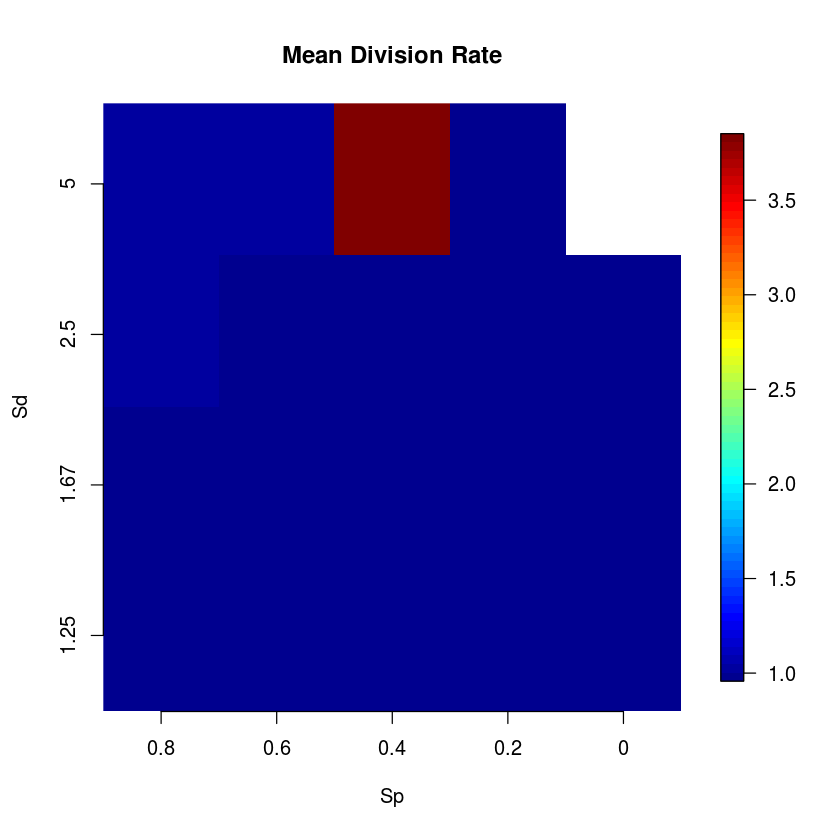

In [17]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(rs_mean[1:20],nrow=4,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Mean Division Rate",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(0.8,0.0,-0.2)); 
axis(2, at=seq(0,1,0.33), labels=c(1.25,1.67,2.50,5.00)); 

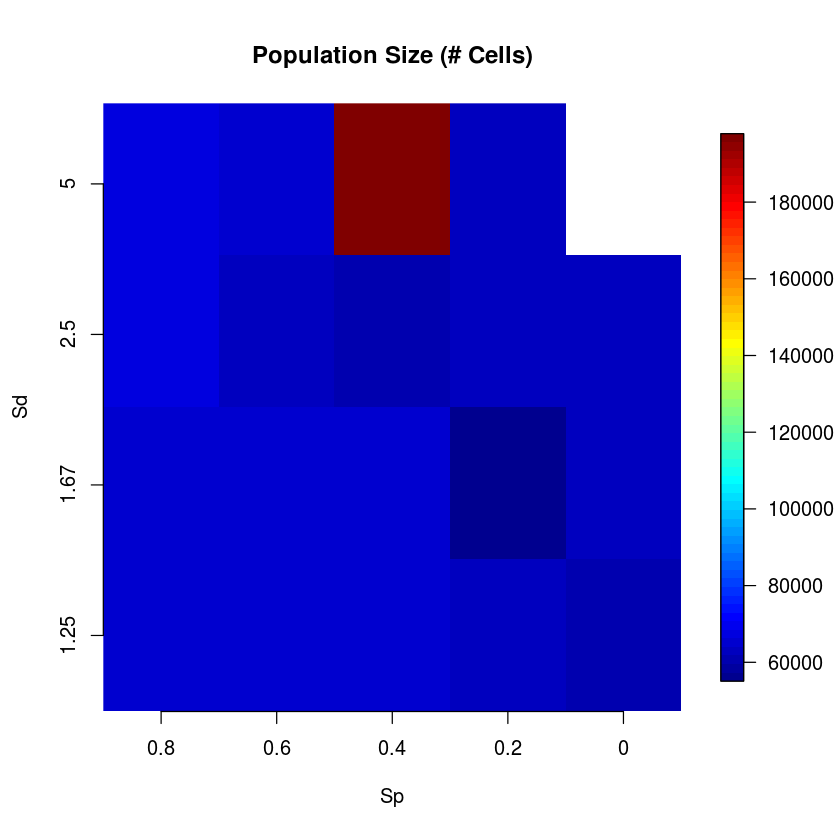

In [18]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(nclst[1:20],nrow=4,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Population Size (# Cells)",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(0.8,0.0,-0.2)); 
axis(2, at=seq(0,1,0.33), labels=c(1.25,1.67,2.50,5.00)); 

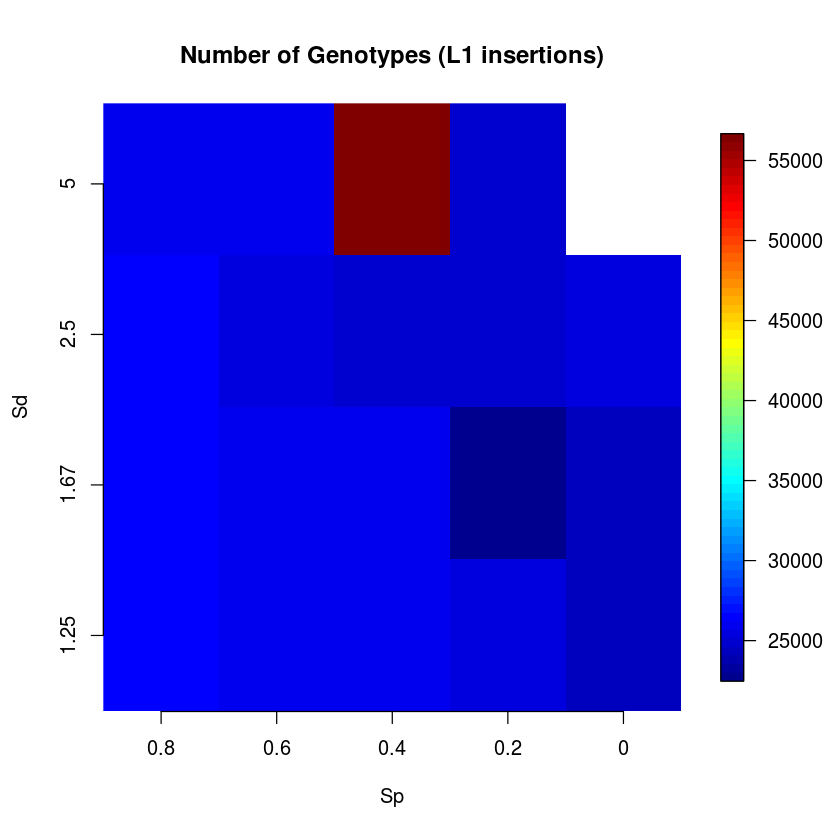

In [19]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(nGeno[1:20],nrow=4,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Number of Genotypes (L1 insertions)",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(0.8,0.0,-0.2)); 
axis(2, at=seq(0,1,0.33), labels=c(1.25,1.67,2.50,5.00)); 